# Exercise 5:  The perceptron

In this notebook you will explore the perceptron algorithm.  For all questions use the scikit-learn [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) and use the implementation of the perceptron we looked at in class.


### Part 1: number of epochs

Explore the accuracy of the perceptron on the breast cancer dataset while varying the number of epochs that the perceptron is trained.  Measure accuracy on both the training and test sets and plot the results as a function of number of epochs (best to use a logarithmic axis for the x-axis, using plt.semilogx).  What can you conclude?


We can conclude that with more epochs, accuracy greatly improves, however from 10 to 20, this has a massive drop. 

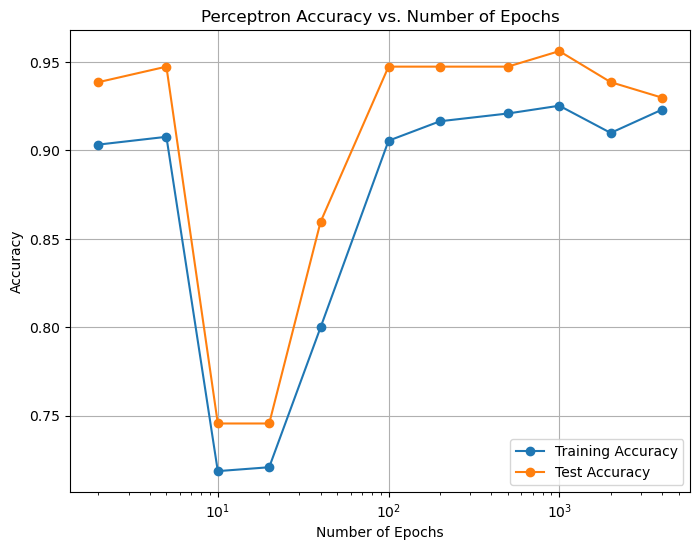

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class perceptron:

    def __init__(self, iterations=100, learning_rate=0.2, 
                 plot_data=False, random_w=False, seed=42):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.plot_data = plot_data
        self.random_w = random_w
        self.seed = seed

    def fit(self, X, y):
        if self.random_w:
            rng = np.random.default_rng(self.seed)
            self.w = rng.uniform(-1 , 1, len(X[0]))
        else:
            self.w = np.zeros(len(X[0]))
        self.wold = self.w
        converged = False
        iteration = 0
        while not converged and iteration <= self.iterations:
            converged = True
            for i in range(len(X)):
                if y[i] * self.decision_function(X[i]) <= 0:
                    self.wold = self.w
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
            iteration += 1
        self.converged = converged
        if converged:
            print(f'Converged in {iteration} iterations')

    def decision_function(self, x):
        return np.dot(x, self.w)

    def predict(self, X):
        scores = np.dot(X, self.w)
        return np.sign(scores)

data = load_breast_cancer()
X = data.data
y = data.target

y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_epochs = [2, 5, 10, 20, 40, 100, 200, 500, 1000, 2000, 4000]

train_accuracies = []
test_accuracies = []

for num_epoch in num_epochs:
    model = perceptron(iterations=num_epoch)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(8, 6))
plt.semilogx(num_epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.semilogx(num_epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Perceptron Accuracy vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()

### Part 2

Can you tell if the breast cancer dataset is linearly separable?

You can tell if the dataset is linearly separable by whether the perceptron eventually exactly emulates the model after a certain number of epochs. In this case, it is not quite linearly separable because there will statistically always be outliers in the real world. The implementation of a perceptron that I used would tell me if the dataset is linearly separable, which it does not.

In [16]:
# and if you want to have some code

### Part 3: the learning rate

How does the learning rate affect the accuracy of the perceptron?
To address this question, plot training and test accuracy as a function of the learning rate.
Again, use plt.semilogx for the x-axis to have a logarithmic scale for the x-axis.

The learning rate essentially controls how fast the perceptron is to adjust itself.

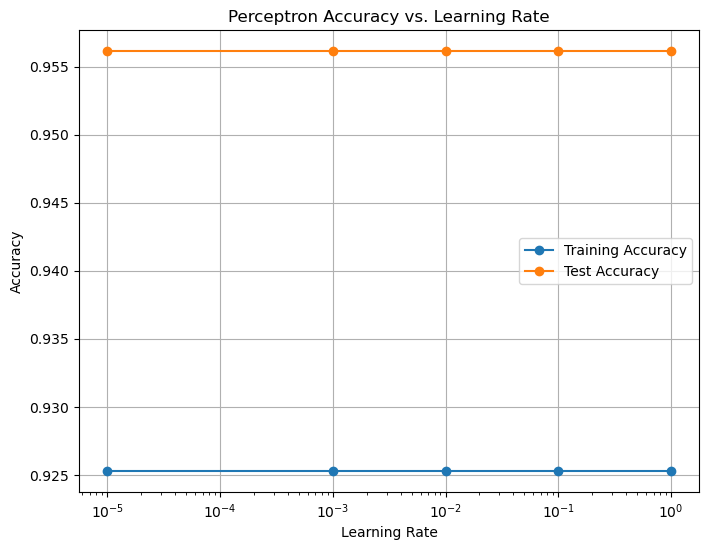

In [19]:
learning_rates = [0.00001, 0.001, 0.01, 0.1, 1]

train_accuracies = []
test_accuracies = []

for learning_rate in learning_rates:
    model = perceptron(iterations=1000, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(8, 6))
plt.semilogx(learning_rates, train_accuracies, label='Training Accuracy', marker='o')
plt.semilogx(learning_rates, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Perceptron Accuracy vs. Learning Rate')
plt.legend()
plt.grid(True)
plt.show()